In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [11]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [29]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


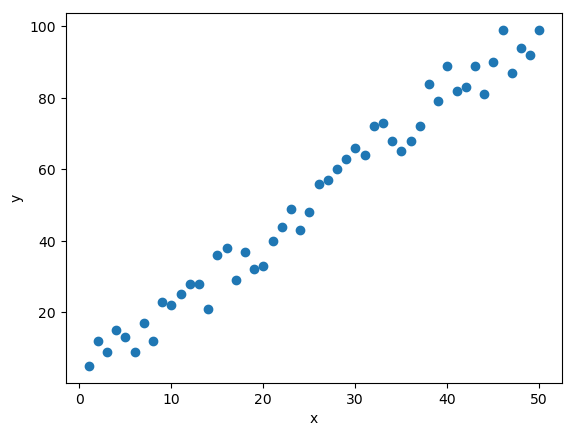

In [13]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [14]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [15]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [16]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [17]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [18]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [19]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [20]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


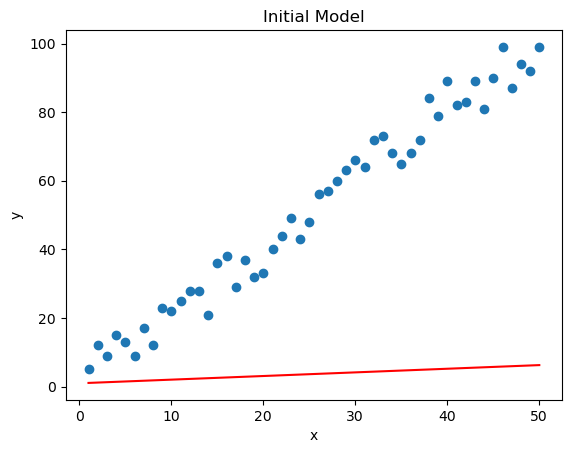

In [21]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

In [22]:
criterion = nn.MSELoss()

In [23]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [24]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53112793  weight: 3.33490038  bias: 1.06046367
epoch:  3  loss: 830.29998779  weight: 1.01483274  bias: 0.99226284
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576  bias: 1.02149546
epoch: 10  loss: 28.98922920  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612625  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

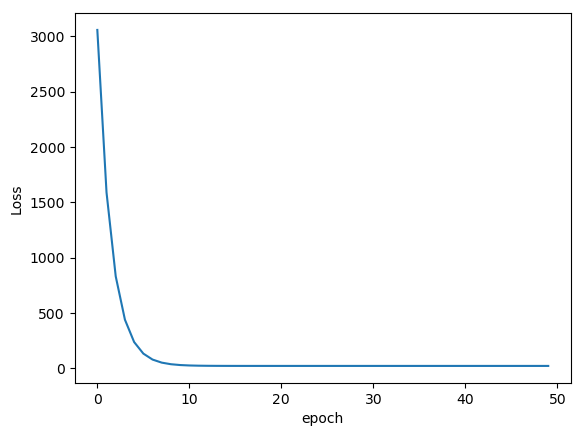

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [26]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1. 50.]
[  3.0395708 100.246704 ]


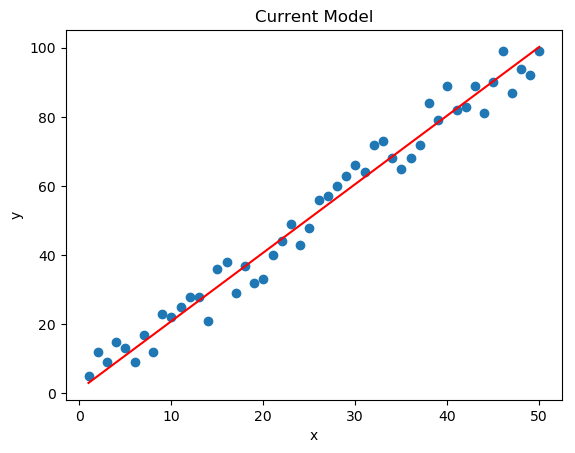

In [27]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

<h1>Using a Dataset for Linear Regression</h1>

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


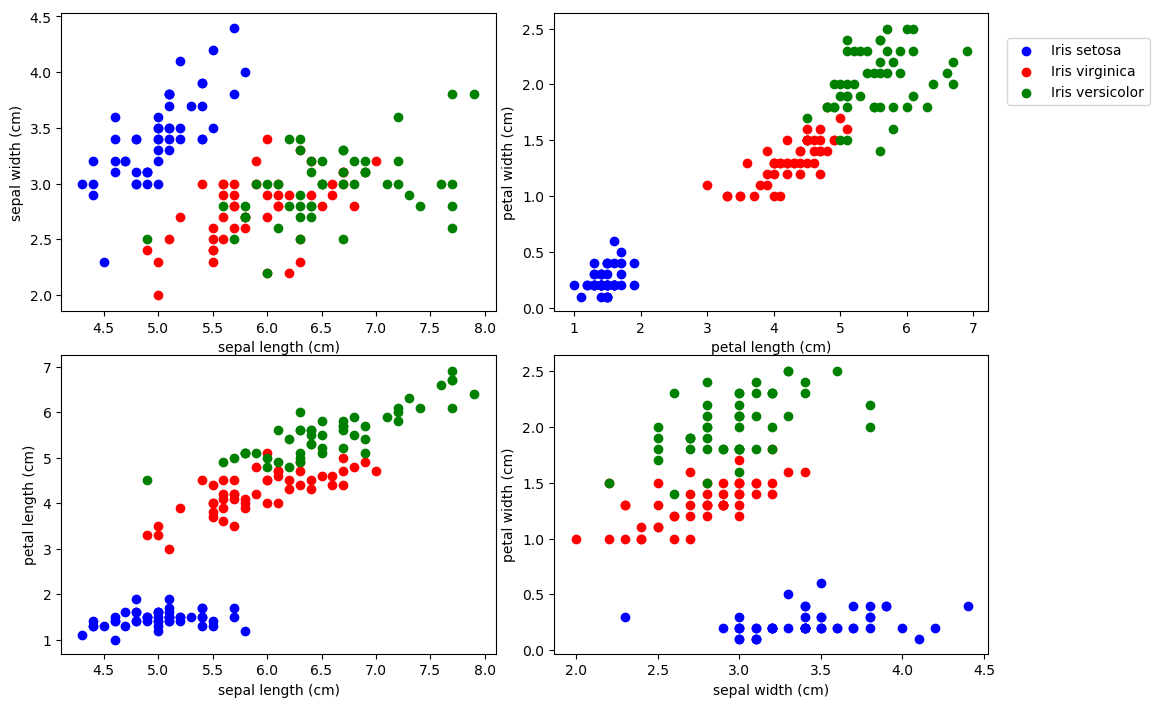

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [45]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [4]:
len(iris)

150

In [5]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [6]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [7]:
iris_loader = DataLoader(iris, batch_size=105, shuffle=True)

In [8]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[5.6000, 3.0000, 4.5000, 1.5000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.7000, 3.8000, 1.7000

<h1>Making my first ANN </h1>

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [35]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=9, h2=8, out_features=3):
        
        super().__init__() #Here the Module class is initialized using super keyword
        self.fc1 = nn.Linear(in_features, h1) #Linear means the layer is fully connected, not linear as in linear activation, Input Layer
        self.fc2 = nn.Linear(h1, h2) #Hidden Layer
        self.out = nn.Linear(h2, out_features) #Output Layer
        
        #3 Layers created fc1, fc2 and out which are all fully connected (Linear or Dense)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        #Forward Pass is played with x being the input. Then x goes through layer 1 and it is updated. The updated x goes through 
        # layer 2 and it is updated again and finally it goes through the out layer with reti=rning the output as x. 
        # We are using the relu actiavtion function for all layers!
        return x

In [36]:
torch.manual_seed(32)
model = Model()

#Here we are initializing our Model class that we have created above!

In [37]:
X = df.drop('target', axis=1)
y = df['target']

In [38]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
type(y)

pandas.core.series.Series

We need to convert the pandas series and datafram of y and X to a numpy array

In [40]:
X = X.values
y = y.values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [43]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [47]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [49]:
epochs = 100
losses = []

for i in range(epochs):

    
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if(i%10 == 0):
        print(f'Epoch {i} and loss is: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1199870109558105
Epoch 10 and loss is: 0.9925969839096069
Epoch 20 and loss is: 0.7313158512115479
Epoch 30 and loss is: 0.4900068938732147
Epoch 40 and loss is: 0.3710559904575348
Epoch 50 and loss is: 0.24815800786018372
Epoch 60 and loss is: 0.1472524255514145
Epoch 70 and loss is: 0.09243609011173248
Epoch 80 and loss is: 0.07043091207742691
Epoch 90 and loss is: 0.06127564609050751


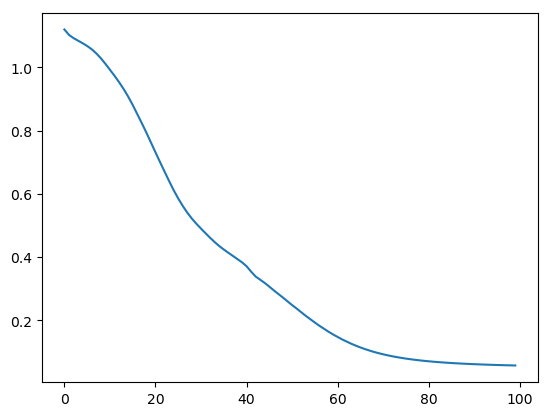

In [50]:
plt.plot(range(epochs), losses)

<h1>Evaluating the Model</h1>

In [53]:
with torch.no_grad():
    
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [54]:
loss

tensor(0.0656)

In [62]:
correct = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}). {str(y_val)} \t{str(y_val.max())} \t {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct+=1
            
print(f'We got {correct} items correct!')

1). tensor([-0.9374,  5.8447, -0.0327]) 	tensor(5.8447) 	 1
2). tensor([-0.4667,  7.0894, -0.8381]) 	tensor(7.0894) 	 1
3). tensor([  8.6019,   2.2461, -14.1043]) 	tensor(8.6019) 	 0
4). tensor([-2.2328,  5.7584,  1.7161]) 	tensor(5.7584) 	 1
5). tensor([-5.7784,  3.1700,  6.8383]) 	tensor(6.8383) 	 2
6). tensor([-8.8258,  1.1293, 11.2089]) 	tensor(11.2089) 	 2
7). tensor([  8.4403,   2.3628, -13.9045]) 	tensor(8.4403) 	 0
8). tensor([  9.4980,   2.2890, -15.4887]) 	tensor(9.4980) 	 0
9). tensor([-5.4312,  3.5850,  6.3076]) 	tensor(6.3076) 	 2
10). tensor([-6.8954,  2.9845,  8.3600]) 	tensor(8.3600) 	 2
11). tensor([-7.6077,  2.4422,  9.3914]) 	tensor(9.3914) 	 2
12). tensor([  8.5008,   2.0678, -13.8929]) 	tensor(8.5008) 	 0
13). tensor([-7.0956,  2.2573,  8.7262]) 	tensor(8.7262) 	 2
14). tensor([-2.4307,  5.2918,  2.0430]) 	tensor(5.2918) 	 1
15). tensor([-5.2484,  4.0017,  6.0103]) 	tensor(6.0103) 	 2
16). tensor([-0.5579,  6.7668, -0.6704]) 	tensor(6.7668) 	 1
17). tensor([-3.8703

<h1>Saving the model!</h1>

We use stat dict to save the model parameters and layers. If we want to save the whole model class we should simply write model and not state dict after it!!!

In [66]:
torch.save(model.state_dict(), 'my_iris_model.pt')

<h1>Loading the Model</h1>


In [67]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [68]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)